In [18]:
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import rsa 
from tesser import plot_models

data_dir = '/Users/morton/data/tesser'
subject = 112

In [19]:
# load structure learning and induction data for one subject
df_struct = util.load_struct(data_dir, subject)
df_induct = util.load_induction(data_dir, subject)

In [20]:
# estimate parameters for this subject
importlib.reload(fit)
alpha, gamma = fit.maximize_likelihood(df_struct, df_induct, 
                                       'differential evolution')
print(f'parameters for subject {subject}: alpha={alpha:.2f}, gamma={gamma:.2f}')

--- 19.034313917160034 seconds ---
parameters for subject 112: alpha=0.95, gamma=1.00


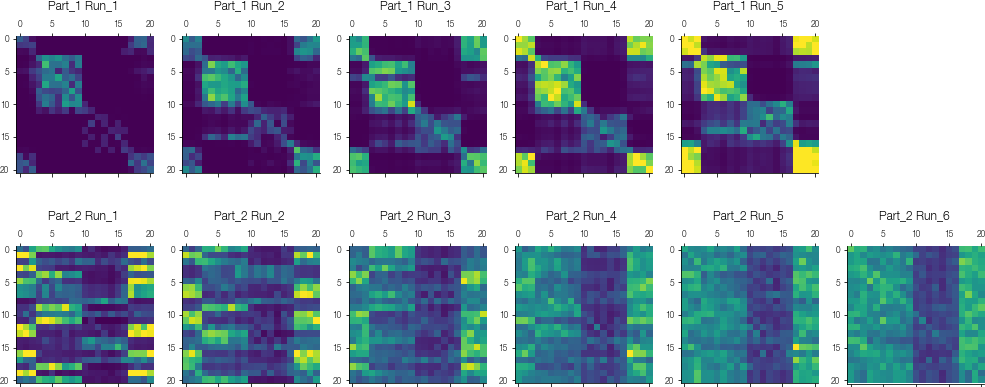

In [22]:
# plot the SR matrix after each run
import importlib
importlib.reload(plot_models)
M = sr.learn_sr(df_struct, gamma, alpha)
plot_models.plot_explore_runs(M, subject, 'persist', gamma, alpha, vmax=10)